In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

import healpy as hp

In [2]:
params = {'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [64]:
gaia = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/data/gaia_dr3/dr9_south_cross_match/sweep-200p010-210p015-gaia.fits'))
cat = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/data/gaia_dr3/dr9_south_cross_match/sweep-200p010-210p015-ls.fits'))
print(len(gaia))

mask = gaia['PHOT_G_MEAN_MAG']<17.65
gaia = gaia[mask]
cat = cat[mask]
print(len(gaia))

32958


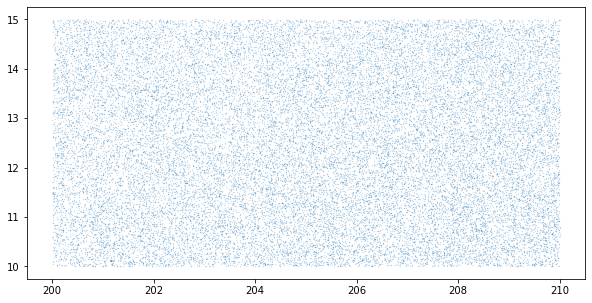

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(cat['RA'], cat['DEC'], '.', ms=0.4, alpha=0.5)
plt.show()

In [79]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    cat['gmag'] = 22.5 - 2.5*np.log10(cat['FLUX_G'])
    cat['rmag'] = 22.5 - 2.5*np.log10(cat['FLUX_R'])
    cat['zmag'] = 22.5 - 2.5*np.log10(cat['FLUX_Z'])
    cat['gmagerr'] = 1/np.sqrt(cat['FLUX_IVAR_G'])/(cat['FLUX_G'])
    cat['rmagerr'] = 1/np.sqrt(cat['FLUX_IVAR_R'])/(cat['FLUX_R'])
    cat['zmagerr'] = 1/np.sqrt(cat['FLUX_IVAR_Z'])/(cat['FLUX_Z'])
    gaia['gmag'] = 22.5 - 2.5*np.log10(gaia['flux_g'])
    gaia['rmag'] = 22.5 - 2.5*np.log10(gaia['flux_r'])
    gaia['zmag'] = 22.5 - 2.5*np.log10(gaia['flux_z'])
    gaia['gmagerr'] = gaia['flux_error_g'] / gaia['flux_g']
    gaia['rmagerr'] = gaia['flux_error_r'] / gaia['flux_r']
    gaia['zmagerr'] = gaia['flux_error_z'] / gaia['flux_z']

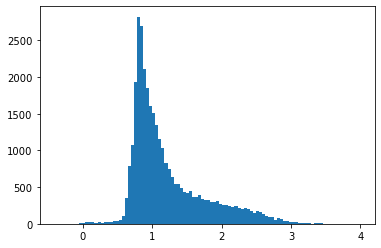

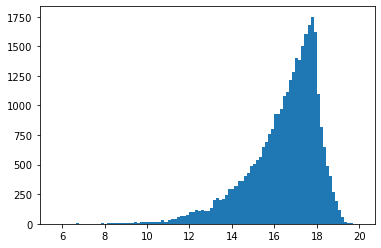

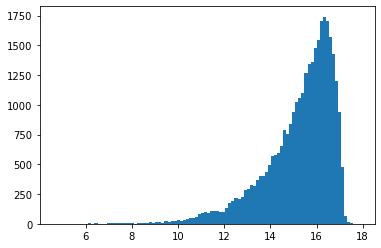

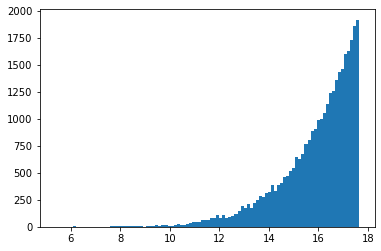

In [67]:
plt.hist(gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'], 100)
plt.show()

plt.hist(gaia['PHOT_BP_MEAN_MAG'], 100)
plt.show()

plt.hist(gaia['PHOT_RP_MEAN_MAG'], 100)
plt.show()

plt.hist(gaia['PHOT_G_MEAN_MAG'], 100)
plt.show()

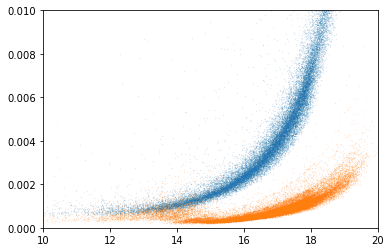

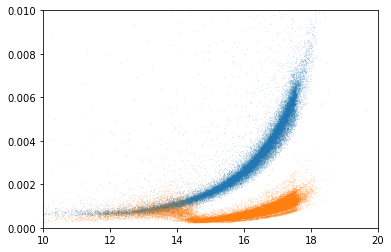

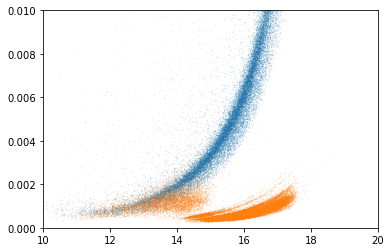

In [84]:
plt.plot(cat['gmag'], gaia['gmagerr'], '.', ms=0.1)
plt.plot(cat['gmag'], cat['gmagerr'], '.', ms=0.1)
plt.axis([10, 20, 0, 0.01])
plt.show()

plt.plot(cat['rmag'], gaia['rmagerr'], '.', ms=0.1)
plt.plot(cat['rmag'], cat['rmagerr'], '.', ms=0.1)
plt.axis([10, 20, 0, 0.01])
plt.show()

plt.plot(cat['zmag'], gaia['zmagerr'], '.', ms=0.1)
plt.plot(cat['zmag'], cat['zmagerr'], '.', ms=0.1)
plt.axis([10, 20, 0, 0.01])
plt.show()

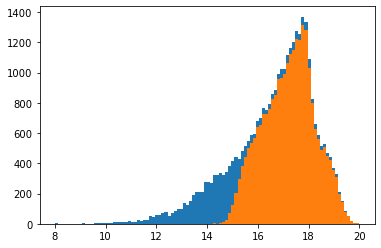

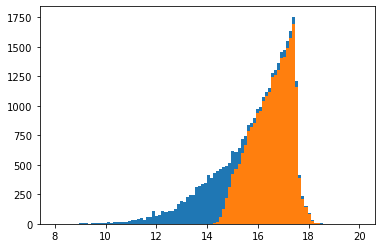

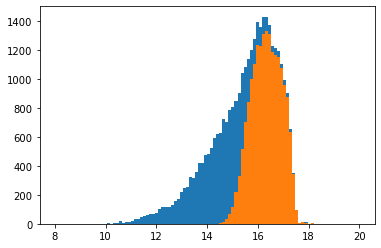

In [68]:
plt.hist(cat['gmag'][np.isfinite(cat['gmag'])], 100, range=(8, 20))
plt.hist(cat['gmag'][np.isfinite(cat['gmag']) & (cat['ANYMASK_G']==0)], 100, range=(8, 20))
plt.show()

plt.hist(cat['rmag'][np.isfinite(cat['rmag'])], 100, range=(8, 20))
plt.hist(cat['rmag'][np.isfinite(cat['rmag']) & (cat['ANYMASK_R']==0)], 100, range=(8, 20))
plt.show()

plt.hist(cat['zmag'][np.isfinite(cat['zmag'])], 100, range=(8, 20))
plt.hist(cat['zmag'][np.isfinite(cat['zmag']) & (cat['ANYMASK_Z']==0)], 100, range=(8, 20))
plt.show()

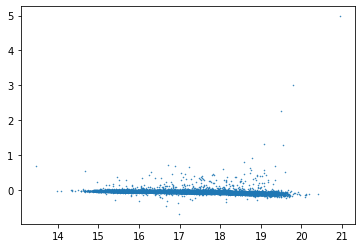

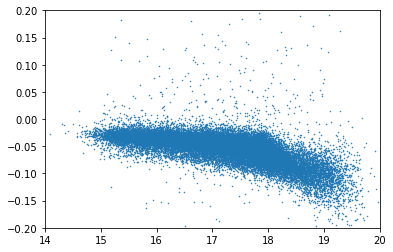

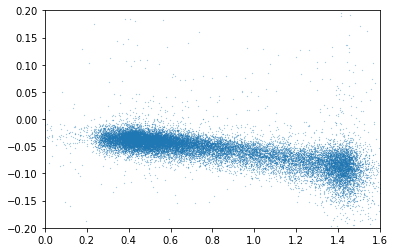

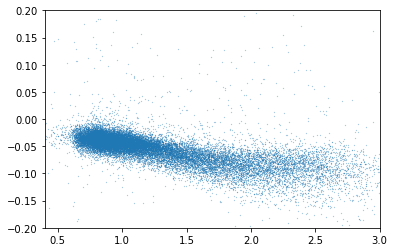

In [50]:
mask = (cat['ANYMASK_G']==0)

plt.plot(cat['gmag'][mask], (cat['gmag']-gaia['gmag'])[mask], '.', ms=1)
plt.show()
plt.plot(cat['gmag'][mask], (cat['gmag']-gaia['gmag'])[mask], '.', ms=1)
plt.axis([14, 20, -0.2, 0.2])
plt.show()

mask = (cat['ANYMASK_G']==0) & (cat['ANYMASK_R']==0)
plt.plot(cat['gmag'][mask]-cat['rmag'][mask], (cat['gmag']-gaia['gmag'])[mask], '.', ms=0.3)
plt.axis([0, 1.6, -0.2, 0.2])
plt.show()

mask = (cat['ANYMASK_G']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['gmag']-gaia['gmag'])[mask], '.', ms=0.3)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

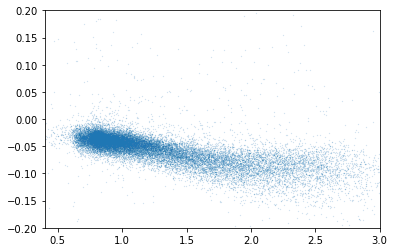

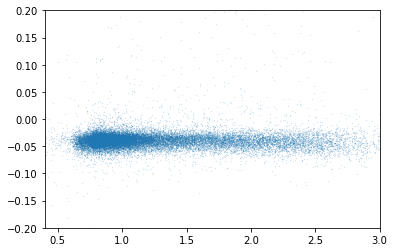

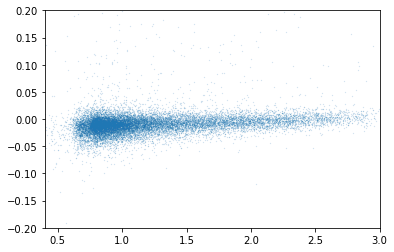

In [60]:
mask = (cat['ANYMASK_G']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['gmag']-gaia['gmag'])[mask], '.', ms=0.3, alpha=0.5)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

mask = (cat['ANYMASK_R']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['rmag']-gaia['rmag'])[mask], '.', ms=0.3, alpha=0.5)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

mask = (cat['ANYMASK_Z']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['zmag']-gaia['zmag'])[mask], '.', ms=0.3, alpha=0.5)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

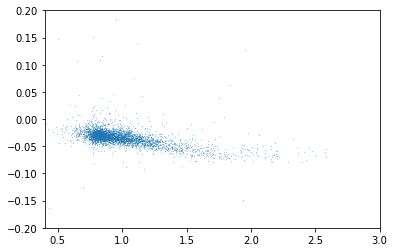

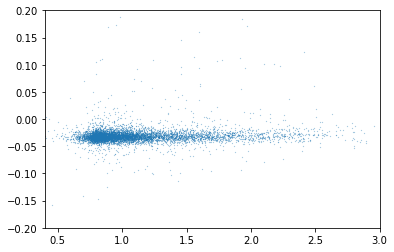

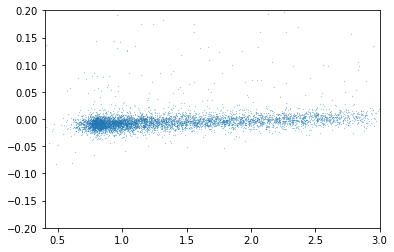

In [61]:
mask = (cat['ANYMASK_G']==0) & (cat['gmag']<16)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['gmag']-gaia['gmag'])[mask], '.', ms=0.3)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

mask = (cat['ANYMASK_R']==0) & (cat['rmag']<16)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['rmag']-gaia['rmag'])[mask], '.', ms=0.3)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

mask = (cat['ANYMASK_Z']==0) & (cat['zmag']<16)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['zmag']-gaia['zmag'])[mask], '.', ms=0.3)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()